In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 100)  # показывать больше строк
pd.set_option('display.max_columns', 100)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

In [2]:
def outliers_mask(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return column.apply(lambda x: True if (lower_bound <= x <= upper_bound) else False)

In [3]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [4]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[(students.loc[:, column] == comb[0]) & (students.score.notnull()), 'score'],
                     students.loc[(students.loc[:, column] == comb[1]) & (students.score.notnull()), 'score']).pvalue \
                     <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [5]:
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [6]:
for column in students.columns:
    display(pd.DataFrame(students[column].value_counts(dropna=False)))

,school
GP,349
MS,46


,sex
F,208
M,187


,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


,address
U,295
R,83
NaN,17


,famsize
GT3,261
LE3,107
NaN,27


,Pstatus
T,314
NaN,45
A,36


,Medu
4.0,131
2.0,102
3.0,97
1.0,59
NaN,3
0.0,3


,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
NaN,24
0.0,2
40.0,1


,Mjob
other,133
services,98
at_home,58
teacher,55
health,32
NaN,19


,Fjob
other,197
services,102
NaN,36
teacher,29
at_home,16
health,15


,reason
course,137
home,104
reputation,103
other,34
NaN,17


,guardian
mother,250
father,86
NaN,31
other,28


,traveltime
1.0,242
2.0,96
NaN,28
3.0,22
4.0,7


,studytime
2.0,194
1.0,103
3.0,64
4.0,27
NaN,7


,failures
0.0,293
1.0,49
NaN,22
2.0,16
3.0,15


,schoolsup
no,335
yes,51
NaN,9


,famsup
yes,219
no,137
NaN,39


,paid
no,200
yes,155
NaN,40


,activities
yes,195
no,186
NaN,14


,nursery
yes,300
no,79
NaN,16


,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27
NaN,7


,higher
yes,356
NaN,20
no,19


,internet
yes,305
no,56
NaN,34


,romantic
no,240
yes,124
NaN,31


,famrel
4.0,182
5.0,99
3.0,62
NaN,27
2.0,17
1.0,7
-1.0,1


,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18
NaN,11


,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23
NaN,8


,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43
NaN,15


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
NaN,12
3.0,8


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
60.0,31
40.0,31
45.0,27
70.0,27
80.0,16


```1. Из 30 признаков 29 указаны в задании. "studytime, granular" с непонятными значениями и нет в описании задачи - убираем
2. Из оставшихся 29 признаков 17 - номинативные
3. Есть пропуски NaN, которые я не знаю как восстановить. Пропусков значений, не несущих информации, отличных от NaN я не выявил
4. В числовых признаках возможны выбросы, они будут обработаны
5. В номинативных признаках есть значения не соответсвующие заданию, они будут исключены (Fedu, famrel)```

In [7]:
students.drop(columns = 'studytime, granular', inplace=True)

In [8]:
students.age = students.age[outliers_mask(students.age)]
students.absences = students.absences[outliers_mask(students.absences)]
students.score = students.score[outliers_mask(students.score)]

In [9]:
students.Fedu = students.Fedu[students.Fedu < 5]
students.famrel = students.famrel[students.famrel > 0]

In [10]:
students.corr()[abs(students.corr()) >= 0.3]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,1.000000,0.629956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fedu,NaN,0.629956,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveltime,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studytime,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
failures,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,-0.344338
famrel,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
freetime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
goout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


```Значительной кореляции между признаками не обнаружил. Наиболее значимые Fedu/Medu, но 0.63 не достаточно для исключения```

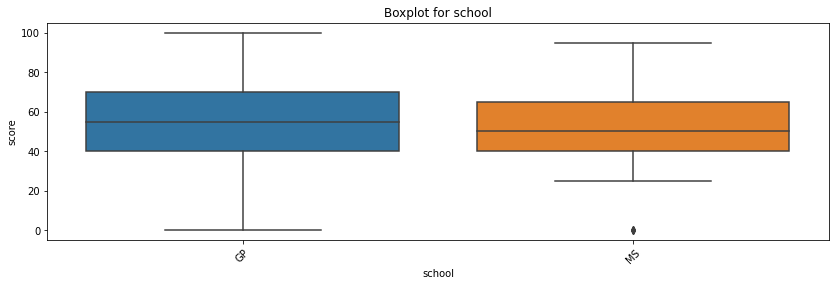

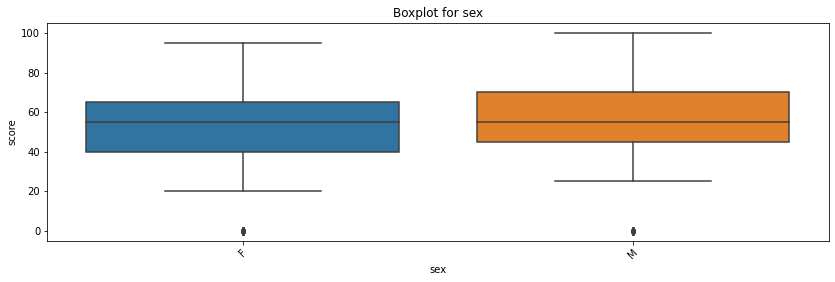

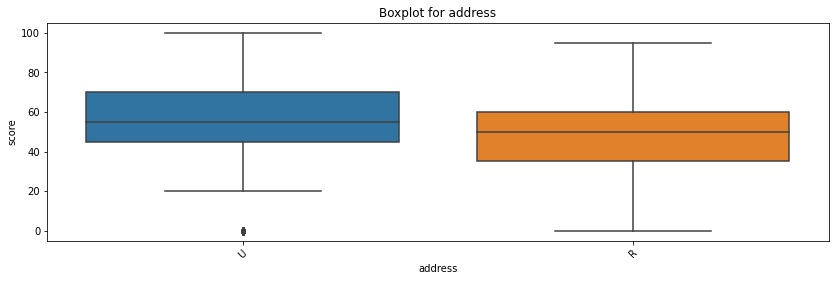

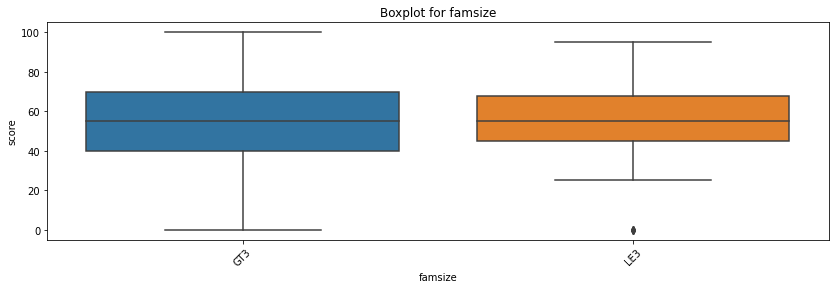

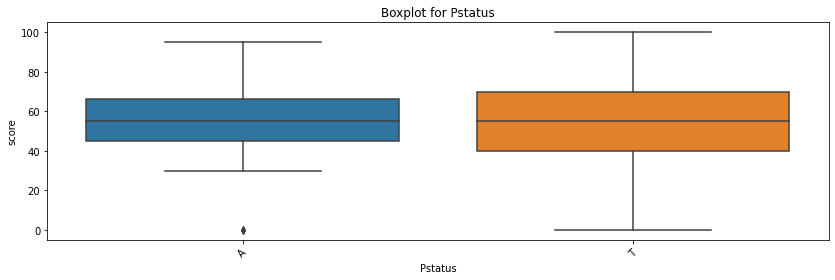

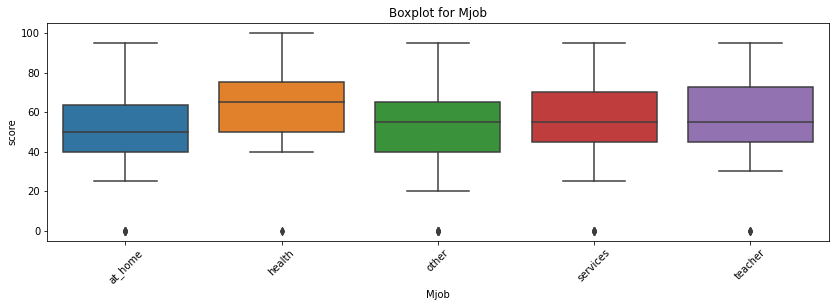

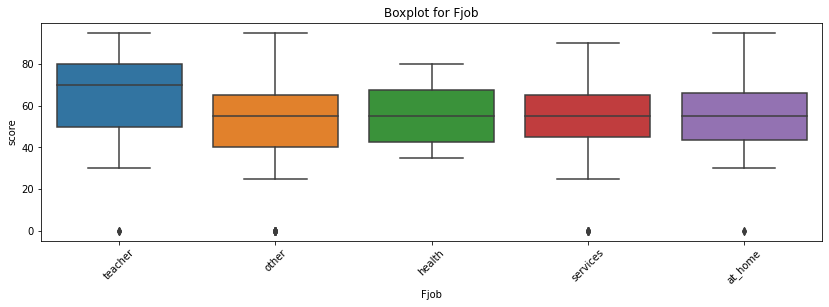

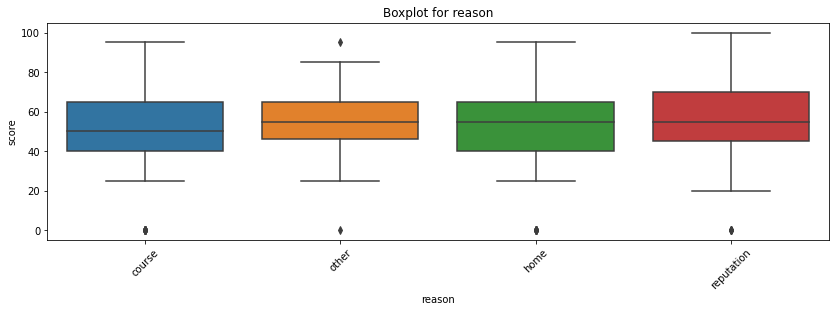

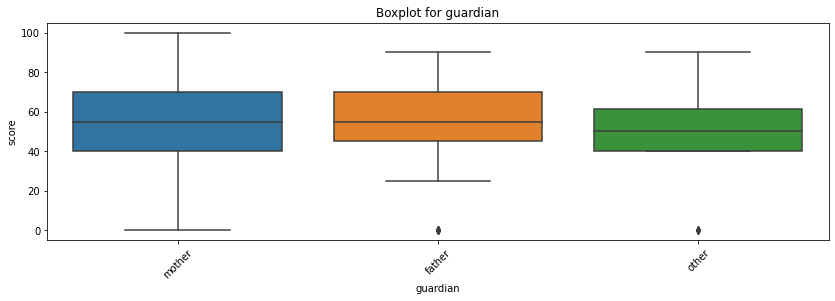

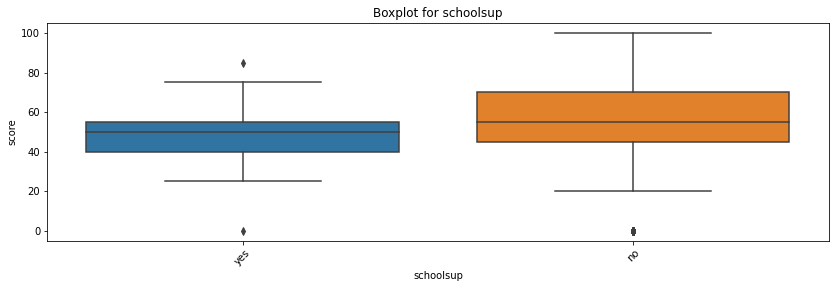

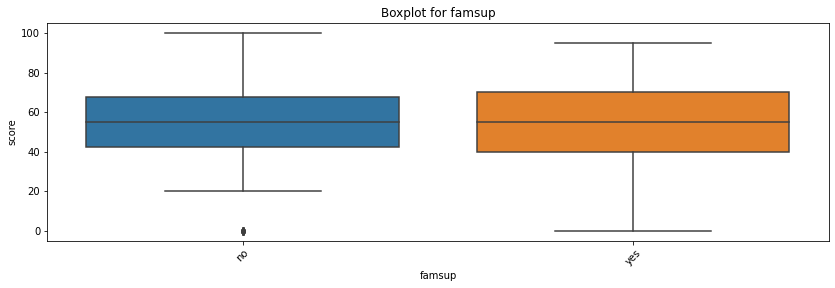

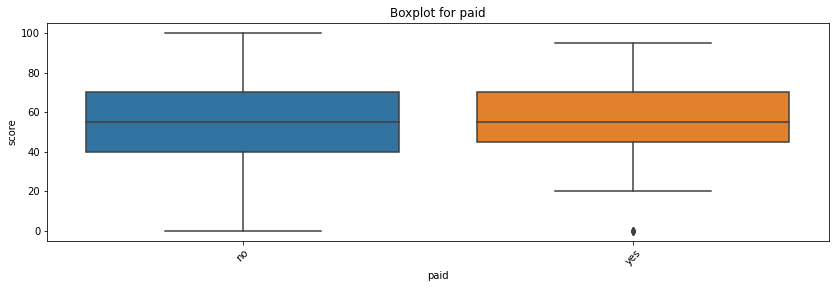

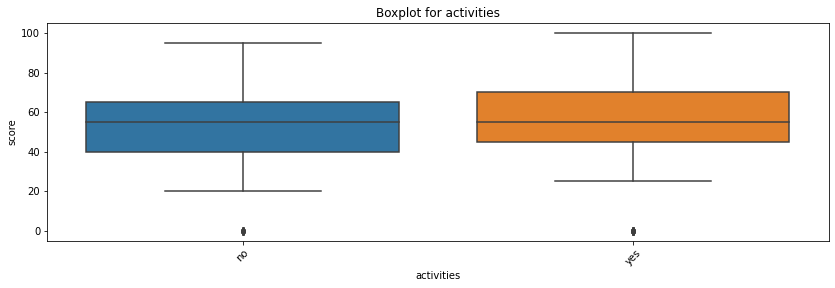

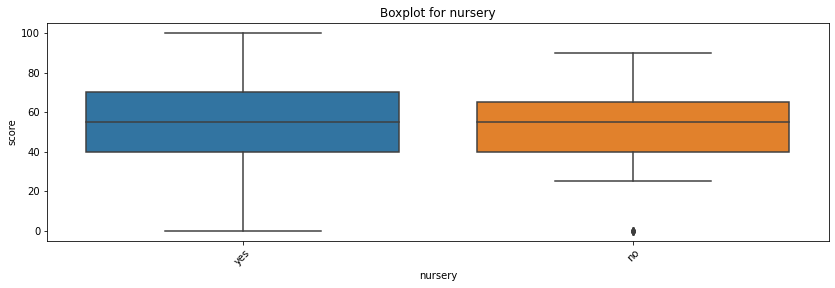

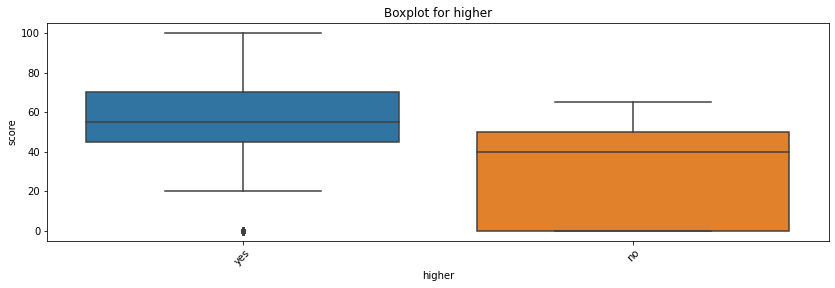

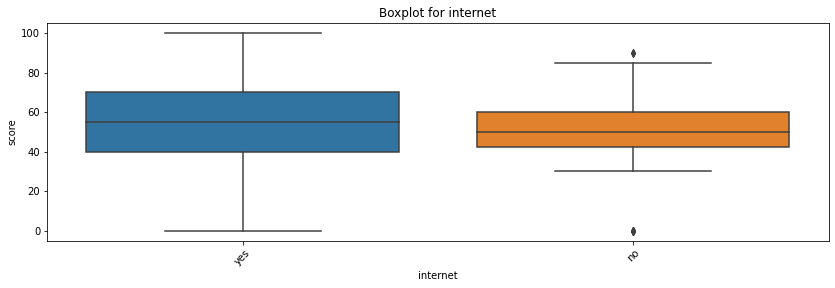

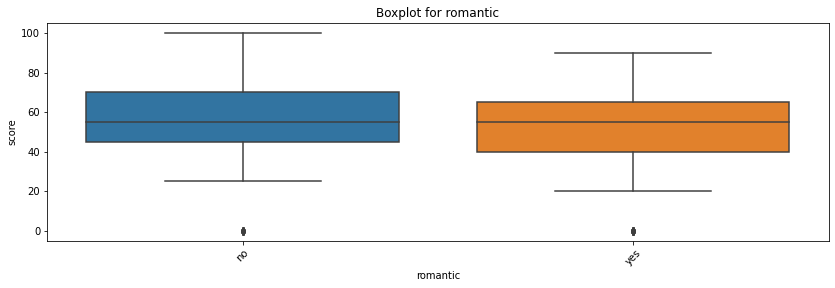

In [11]:
for col in students.columns.drop(students.corr().index):
    get_boxplot(col)

In [12]:
for col in students.columns.drop(students.corr().index):
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [13]:
students_index_for_model = students.corr().index.to_list()
students_index_for_model.remove('score')
students_index_for_model += ['address', 'Mjob', 'higher', 'romantic']

students_for_model = students[students_index_for_model]
students_for_model

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,address,Mjob,higher,romantic
0,18.0,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,U,at_home,yes,no
1,17.0,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,U,at_home,yes,no
2,15.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,U,at_home,yes,NaN
3,15.0,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,U,health,yes,yes
4,16.0,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,U,other,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20.0,2.0,2.0,1.0,2.0,2.0,5.0,5.0,4.0,4.0,NaN,U,services,yes,no
391,17.0,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,2.0,3.0,U,services,yes,no
392,21.0,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,R,other,NaN,no
393,18.0,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,R,services,yes,no


In [14]:
# students_for_model.to_csv('stud_math_EDA.csv')